# Activity 1: Supervised Learning

In this project, our objective is to make predictions and classifications using a real-world dataset. Specifically, we focus on the prices of diamonds as our target variable.

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import math
import warnings

# PREDICTION
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# MLR
from sklearn.linear_model import LinearRegression

# k-NN
from sklearn.neighbors import KNeighborsRegressor

# MLNN-BP
from sklearn.neural_network import MLPRegressor

# PRICE CLASSIFICATION
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# LR
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn.svm import SVC

# MLNN-BP
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
# Avoid the warning that occurs when the epoch-based models do not converge (as we make it not converge on purpose in order to perform as many epochs as we want)
# Note that in the Docker container, the warning is shown anyway for some unknown reason and it is not possible to avoid it
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 1. Read the data

In [ ]:
# Read training data file
df = pd.read_csv('diamonds-train.csv', sep = ',', na_filter=False , index_col = 0)
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44000 entries, 1 to 44000
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    44000 non-null  float64
 1   cut      44000 non-null  object 
 2   color    44000 non-null  object 
 3   clarity  44000 non-null  object 
 4   depth    44000 non-null  float64
 5   table    44000 non-null  float64
 6   x        44000 non-null  float64
 7   y        44000 non-null  float64
 8   z        44000 non-null  float64
 9   price    44000 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


## 2. Data Pre-processing

In [ ]:
df[['cut','color','clarity']] = df[['cut','color','clarity']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44000 entries, 1 to 44000
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    44000 non-null  float64 
 1   cut      44000 non-null  category
 2   color    44000 non-null  category
 3   clarity  44000 non-null  category
 4   depth    44000 non-null  float64 
 5   table    44000 non-null  float64 
 6   x        44000 non-null  float64 
 7   y        44000 non-null  float64 
 8   z        44000 non-null  float64 
 9   price    44000 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 2.8 MB


In [ ]:
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


In [ ]:
columns = df.columns.tolist() # All columns list
print(columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']


### a) Identify the patterns with “non-physical” data

---



In this section we have to search for "non-physical" values that appear in the given data so we can delete non coherent numbers (like negative metric measures).

In [ ]:
non_categorical_cols = df.select_dtypes(exclude=['category']).columns.tolist() # Non categorical columns list
print(f"Non categorical columns: {non_categorical_cols}")

Non categorical columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [ ]:
# Search for negative values
columns_with_negative_values = []
for col in non_categorical_cols:
    if (df[col] < 0).any(): # Checks if there is ANY negative values
        print(f"Column '{col}' contains negative values.")
        print(df[df[col] < 0])
        columns_with_negative_values.append(col)

# Search for zero values
columns_with_zero_values = []
for col in non_categorical_cols:
    if (df[col] == 0).any(): # Checks if there is ANY zero values
      print(f"Column '{col}' contains zero values.")
      print(df[df[col] == 0])
      columns_with_zero_values.append(col)

Column 'x' contains zero values.
       carat        cut color clarity  depth  table    x    y    z  price
id                                                                       
1578    1.00  Very Good     H     VS2   63.3   53.0  0.0  0.0  0.0   5139
9859    1.56      Ideal     G     VS2   62.2   54.0  0.0  0.0  0.0  12800
11596   1.14       Fair     G     VS1   57.5   67.0  0.0  0.0  0.0   6381
11838   0.71       Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
15635   0.71       Good     F     SI2   64.1   60.0  0.0  0.0  0.0   2130
30338   2.25    Premium     H     SI2   62.8   59.0  0.0  0.0  0.0  18034
Column 'y' contains zero values.
       carat        cut color clarity  depth  table    x    y    z  price
id                                                                       
1578    1.00  Very Good     H     VS2   63.3   53.0  0.0  0.0  0.0   5139
9859    1.56      Ideal     G     VS2   62.2   54.0  0.0  0.0  0.0  12800
11596   1.14       Fair     G     VS1   57.5  

In [ ]:
# We set the given ranges for each attribute:
ranges = {
    'price': (326, 18823),
    'carat': (0.2, 5.01),
    'x': (0, 10.74),
    'y': (0, 58.9),
    'z': (0, 31.8),
    'depth': (43, 79),
    'table': (43, 95)
}

# Check if ALL the non categorical column values are within the specified range
for col, (min_val, max_val) in ranges.items():
    out_range = df[(df[col] < min_val) | (df[col] > max_val)]
    if not out_range.empty:
        print(f"Column '{col}' contains values outside the range ['{min_val}','{max_val}']:")
        print(out_range)


All the values were in the defined ranges. Only non-coherent zero values were found, as there are rows with $z = 0$ but $depth \neq 0$, having defined depth as $\frac{2 \cdot z}{x+y}$.

We will delete them:

In [ ]:
# Remove rows where 'x', 'y', or 'z' are equal to 0
# defining .any(axis=1) we check for all rows with any of its variables equal to zero
df = df[~(df[columns_with_zero_values] == 0).any(axis=1)]


### b) Identify outliers from the distribution of each attribute.

Now, we will search for outliers in the data. To do that, we will use
1. Scatter plots
2. Box plots
3. Histograms

Scatter plots between every pair of non-categorical attributes:

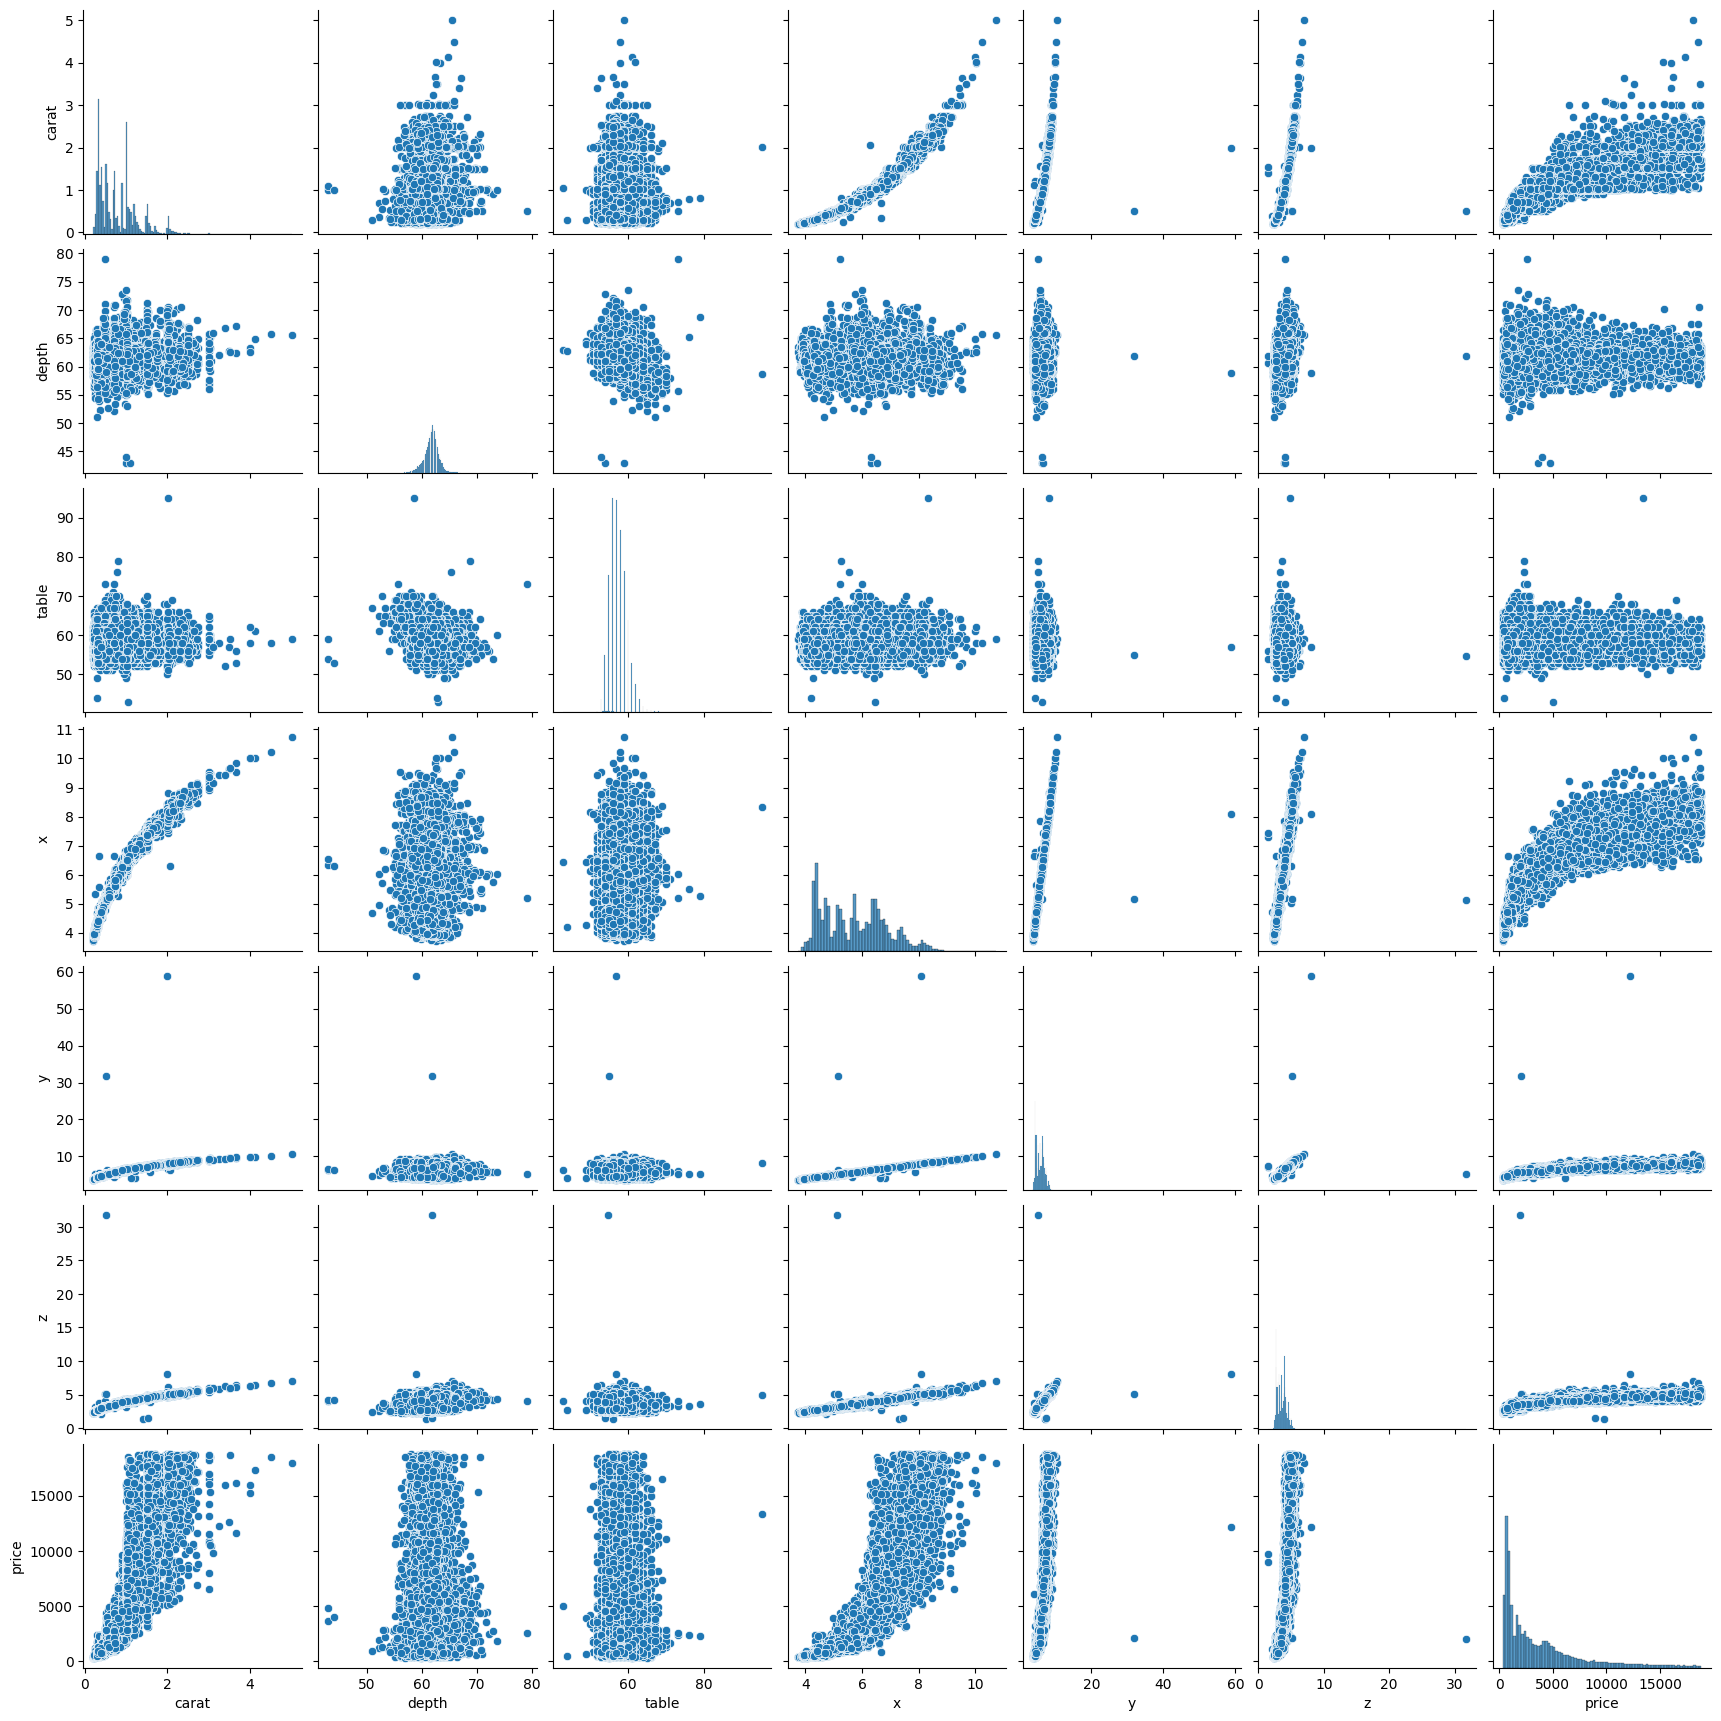

In [ ]:
sns.pairplot(df)

Boxplots of categorical data:

In [ ]:
categorical_cols = df.select_dtypes(include=['category']).columns.tolist() # Categorical columns list
print('Categorical columns:', categorical_cols)

Categorical columns: ['cut', 'color', 'clarity']


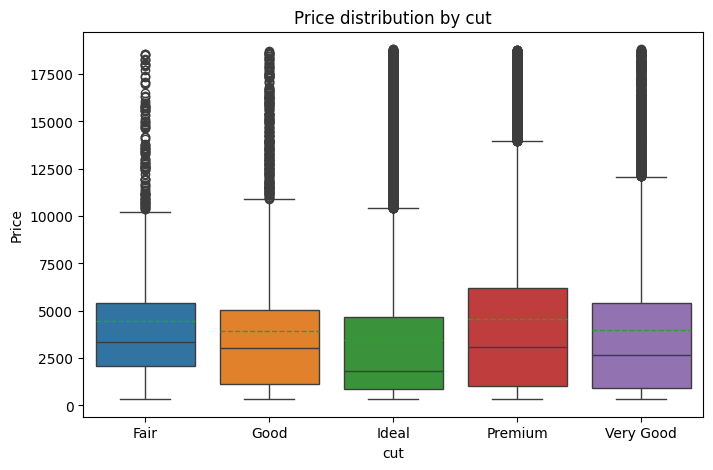

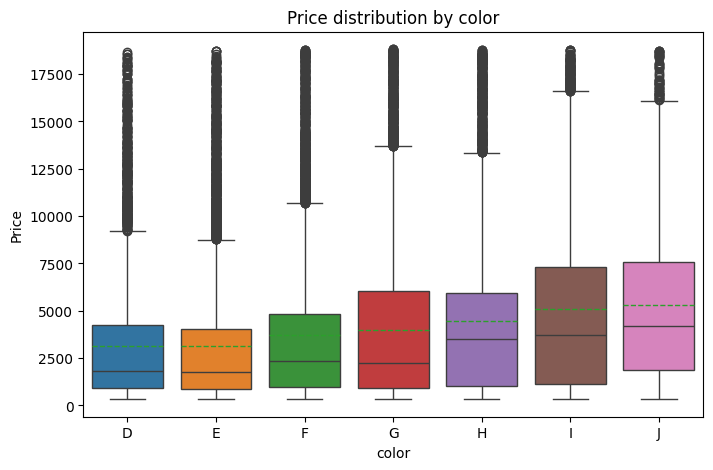

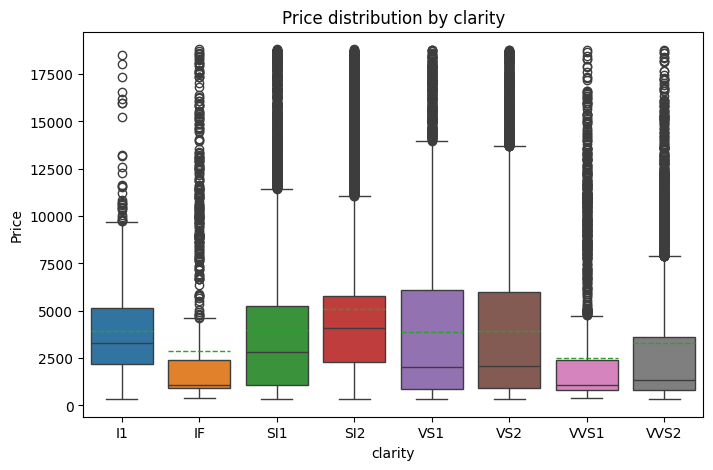

In [ ]:
for column in categorical_cols:
    # For categorical variables, use a boxplot for price distribution
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, y='price', hue=column, legend=False, showmeans=True, meanline=True)
    plt.title(f'Price distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

Boxplots of non-categorical data:

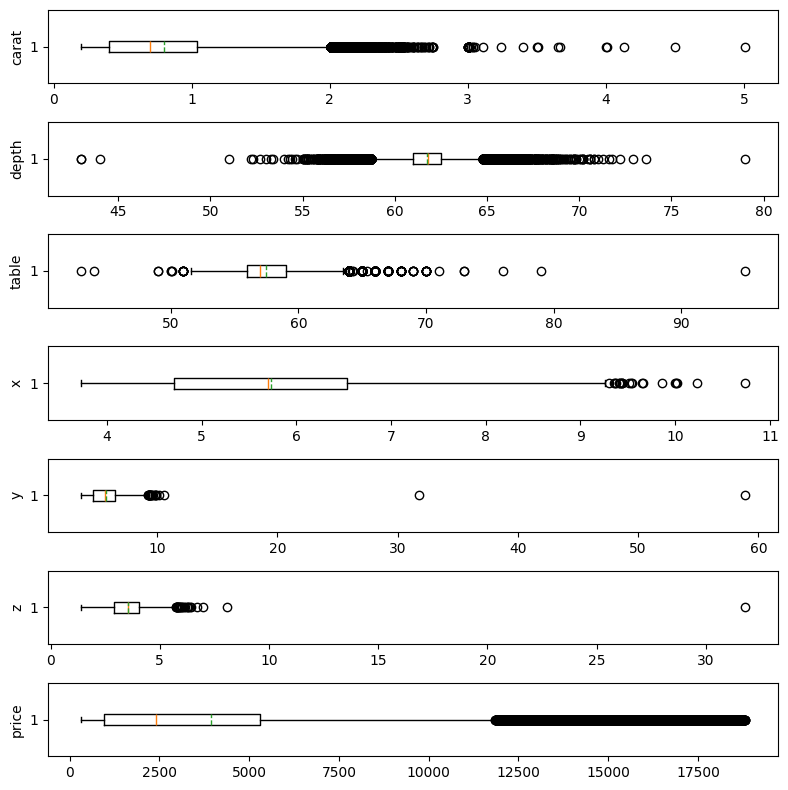

In [ ]:
# Box Plots
fig, axs = plt.subplots(len(non_categorical_cols), 1, figsize=(8, 8))
i = 0
for col in non_categorical_cols:
    axs[i].boxplot(df[col], vert=False, showmeans=True, meanline=True)
    axs[i].set_ylabel(col)
    i += 1
plt.tight_layout()
plt.show()

Histograms:

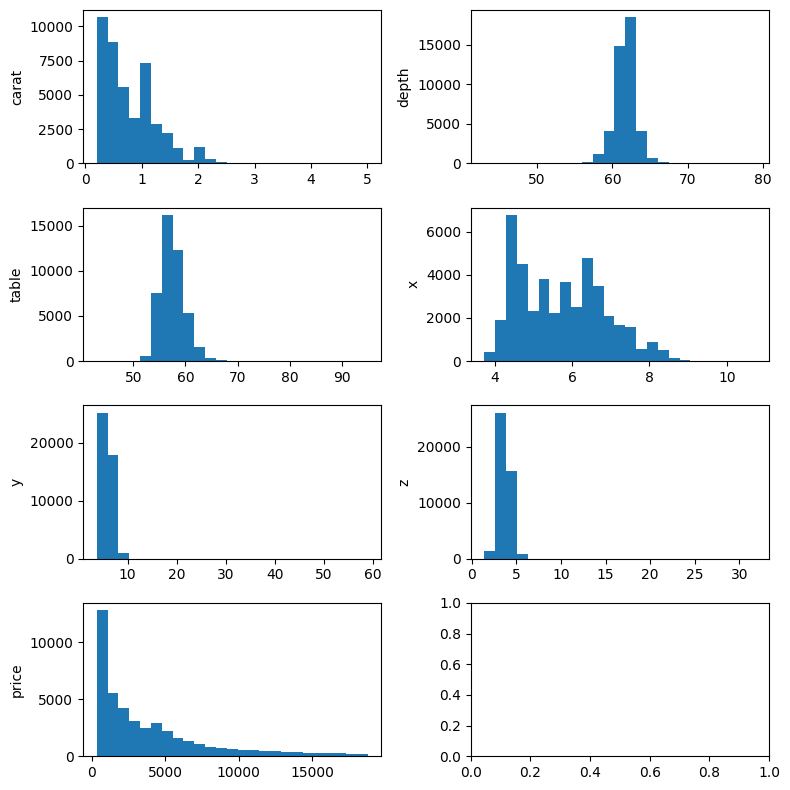

In [ ]:
# Histograms
fig, axs = plt.subplots(math.ceil(len(non_categorical_cols)/2), 2, figsize=(8,8))
i = 0
for col in non_categorical_cols:
    axs[i // 2, i % 2].hist(df[col], bins=25)
    axs[i // 2, i % 2].set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

### c) Identify outliers from attribute/price scatter plots.

Scatter plot of only non-categorical attributes vs price (we don't plot categorical values because it would be of no use, as boxplots already serve the same purpose):

In [ ]:
non_categorical_no_price_cols = non_categorical_cols.copy()
non_categorical_no_price_cols.remove('price') # non categorical columns list without the price column
print('Non categorical columns without the price:', non_categorical_no_price_cols)

Non categorical columns without the price: ['carat', 'depth', 'table', 'x', 'y', 'z']


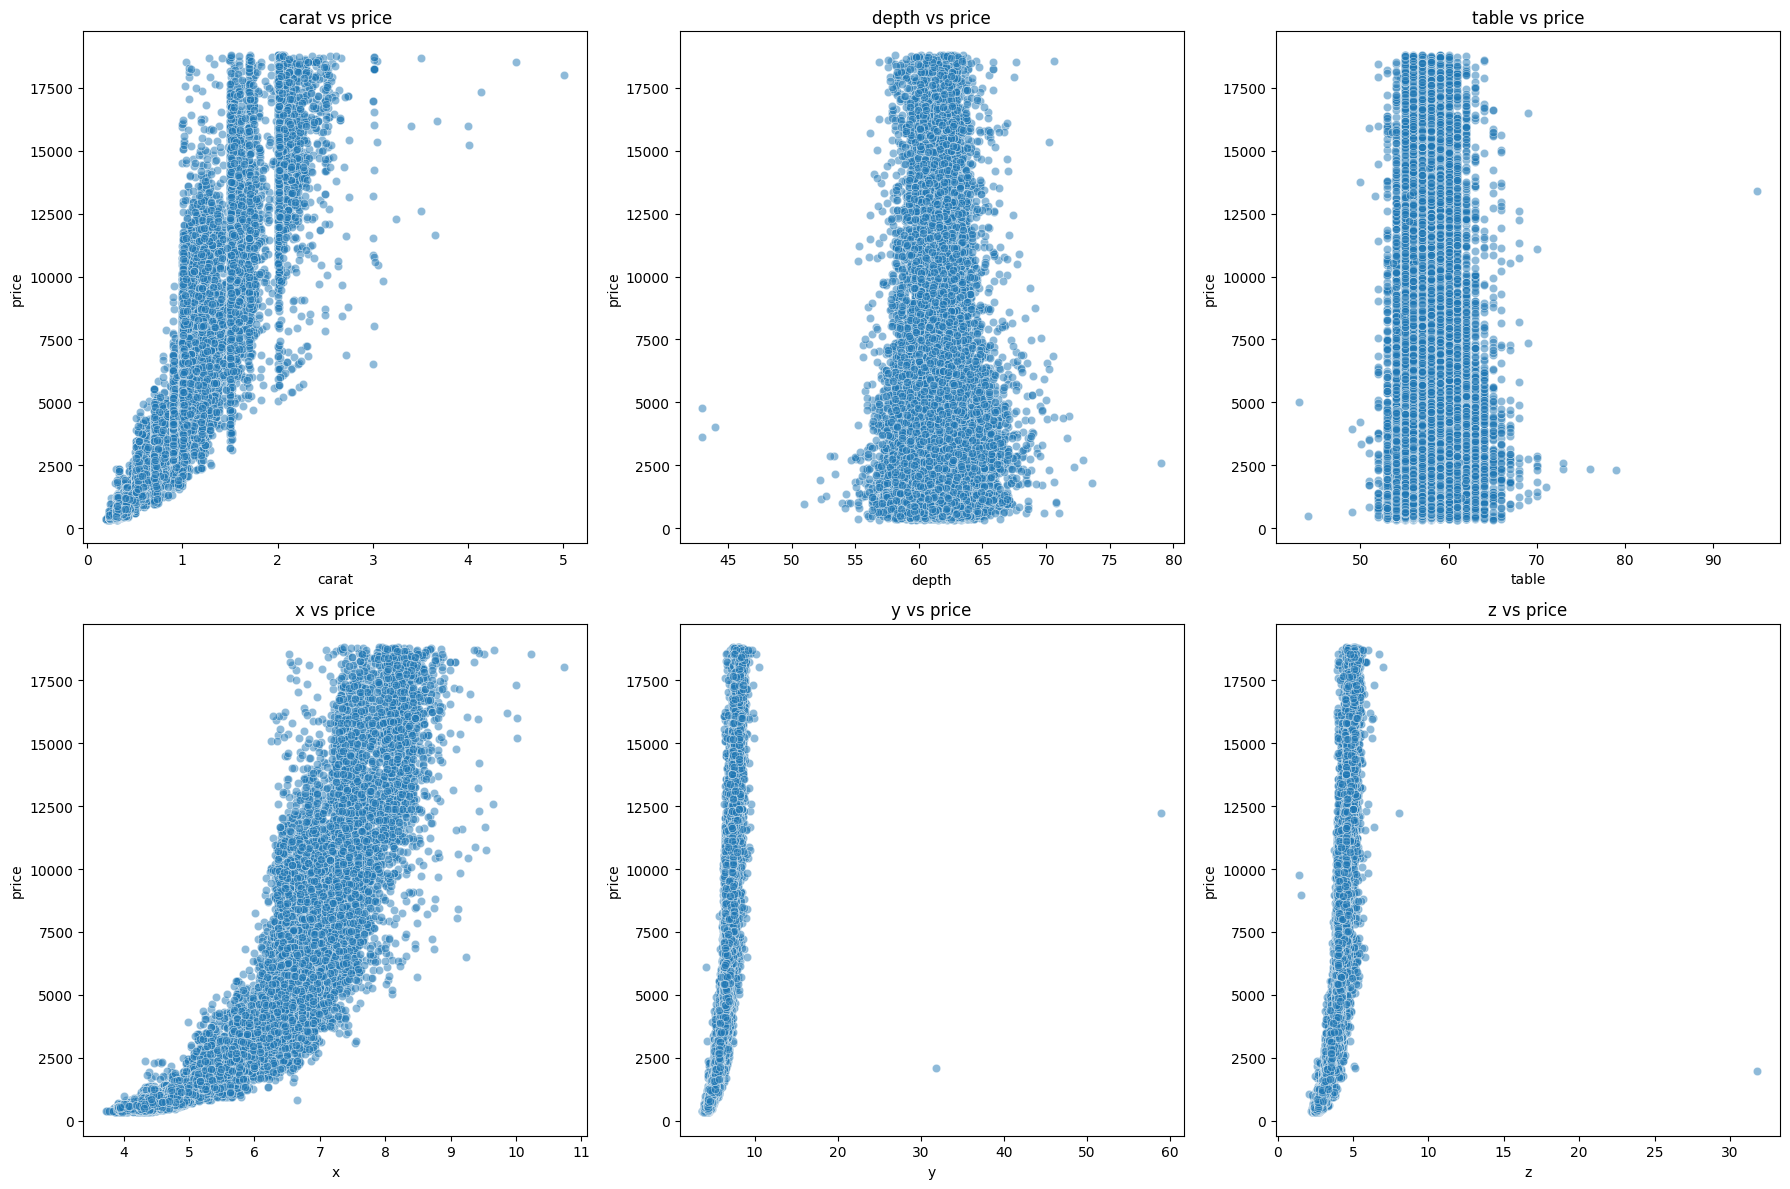

In [ ]:
plt.figure(figsize=(18, 12))
for idx, feature in enumerate(non_categorical_no_price_cols, 1):
    plt.subplot(math.ceil(len(non_categorical_no_price_cols)/3), 3, idx)
    sns.scatterplot(x=feature, y='price', alpha=.5, data=df)
    plt.title(f'{feature} vs price')
plt.tight_layout()
plt.show()

### d) Make a table with the outlier identifiers, their attributes, and the reasons for which each is considered an outlier.

First, we notice there are no outliers that come from categorical attributes, as all data points outside the boxplots's whiskers are continuously distributed, not clearly isolated.\
Therefore we are only going to work with non-categorical values.

After going back to observe the plots of section **b**, we notice outliers on the Pairplot (the first plot of the section) and the Boxplots of non-categorical data (the third one).\
Since section **c**'s plots are already included in section **b**'s pairplot, we will not work with them in a dedicated piece of code.\
If we stop for a moment and think, we also realize that the boxplots and the Pairplot contain the same information on outliers, as boxplots are just projections of the Pairplot data on the corresponding axis.

In [ ]:
# New data frame to save outlayers
out_df = pd.DataFrame(
    False, # fill value
    index = df.index, # same number of rows
    columns = ['out_' + col for col in non_categorical_cols]  # renamed columns
)

# First we determine the thresholds for outliers, which we define by looking at the plots
thresh_out = {
    'price': (326, 18823),
    'carat': (0.2, 5.01),
    'x': (0, 10.74),
    'y': (0, 20),
    'z': (1.75, 10),
    'depth': (50, 77),
    'table': (45, 74)
}

# Loop through each column and check for outliers
for col, (thresh_inf, thresh_sup) in thresh_out.items():
    # Define the outlier condition
    outlier_condition = (df[col] < thresh_inf) | (df[col] > thresh_sup)

    # Update the out_df DataFrame
    out_df['out_' + col] = outlier_condition

# Remove rows where all columns are False
# This means that the row is not an outlier in any column
out_df = out_df[~(out_df == False).all(axis=1)]

out_df.head()


,out_carat,out_depth,out_table,out_x,out_y,out_z,out_price
id,,,,,,,
1092,False,True,False,False,False,False,False
4497,False,False,True,False,False,False,False
5163,False,False,True,False,False,False,False
6368,False,False,False,False,False,True,False
7480,False,True,False,False,False,False,False


In [ ]:
# Right-join the outliers with the original DataFrame
# This will keep all the rows from out_df and add the corresponding rows from df
outliers = df.merge(out_df, left_index=True, right_index=True, how='right')
outliers.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,out_carat,out_depth,out_table,out_x,out_y,out_z,out_price
id,,,,,,,,,,,,,,,,,
1092,1.00,Fair,G,SI1,43.0,59.0,6.32,6.27,3.97,3634,False,True,False,False,False,False,False
4497,2.01,Fair,F,SI1,58.6,95.0,8.32,8.31,4.87,13387,False,False,True,False,False,False,False
5163,0.81,Fair,F,SI2,68.8,79.0,5.26,5.20,3.58,2301,False,False,True,False,False,False,False
6368,1.41,Ideal,H,VS1,60.7,56.0,7.31,7.22,1.41,9752,False,False,False,False,False,True,False
7480,1.09,Ideal,J,VS2,43.0,54.0,6.53,6.55,4.12,4778,False,True,False,False,False,False,False


### e) Decide what to do with the outliers and apply it to the datasets

We decided to remove all the outliers

In [ ]:
outliers_ind = outliers.index.tolist()
print(f"There are {len(outliers_ind)} outliers in the dataset.")

# Remove outliers from the original DataFrame
df_clean = df.drop(index=outliers_ind)

df_clean.head(5)

There are 14 outliers in the dataset.


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


In [ ]:
# Reset indexes so that there are no skipped numbers
df_clean = df_clean.reset_index(drop=True) # remove old index
df_clean.index = range(1, len(df_clean) + 1) # set new index
df_clean.index.name = 'id' # restablish index name
df_clean.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,0.53,Very Good,D,VS2,63.2,56.0,5.10,5.15,3.24,1601
2,0.32,Premium,H,VS2,62.4,58.0,4.36,4.33,2.71,648
3,0.76,Ideal,I,SI1,61.8,57.0,5.89,5.83,3.62,2399
4,1.01,Good,H,VS2,60.8,61.0,6.43,6.50,3.93,5229
5,0.73,Ideal,I,VS1,62.1,54.0,5.77,5.80,3.59,2167


Now we plot the same two representations with the clean data to see if everything looks correct

Scatter plots between every pair of non-categorical attributes:

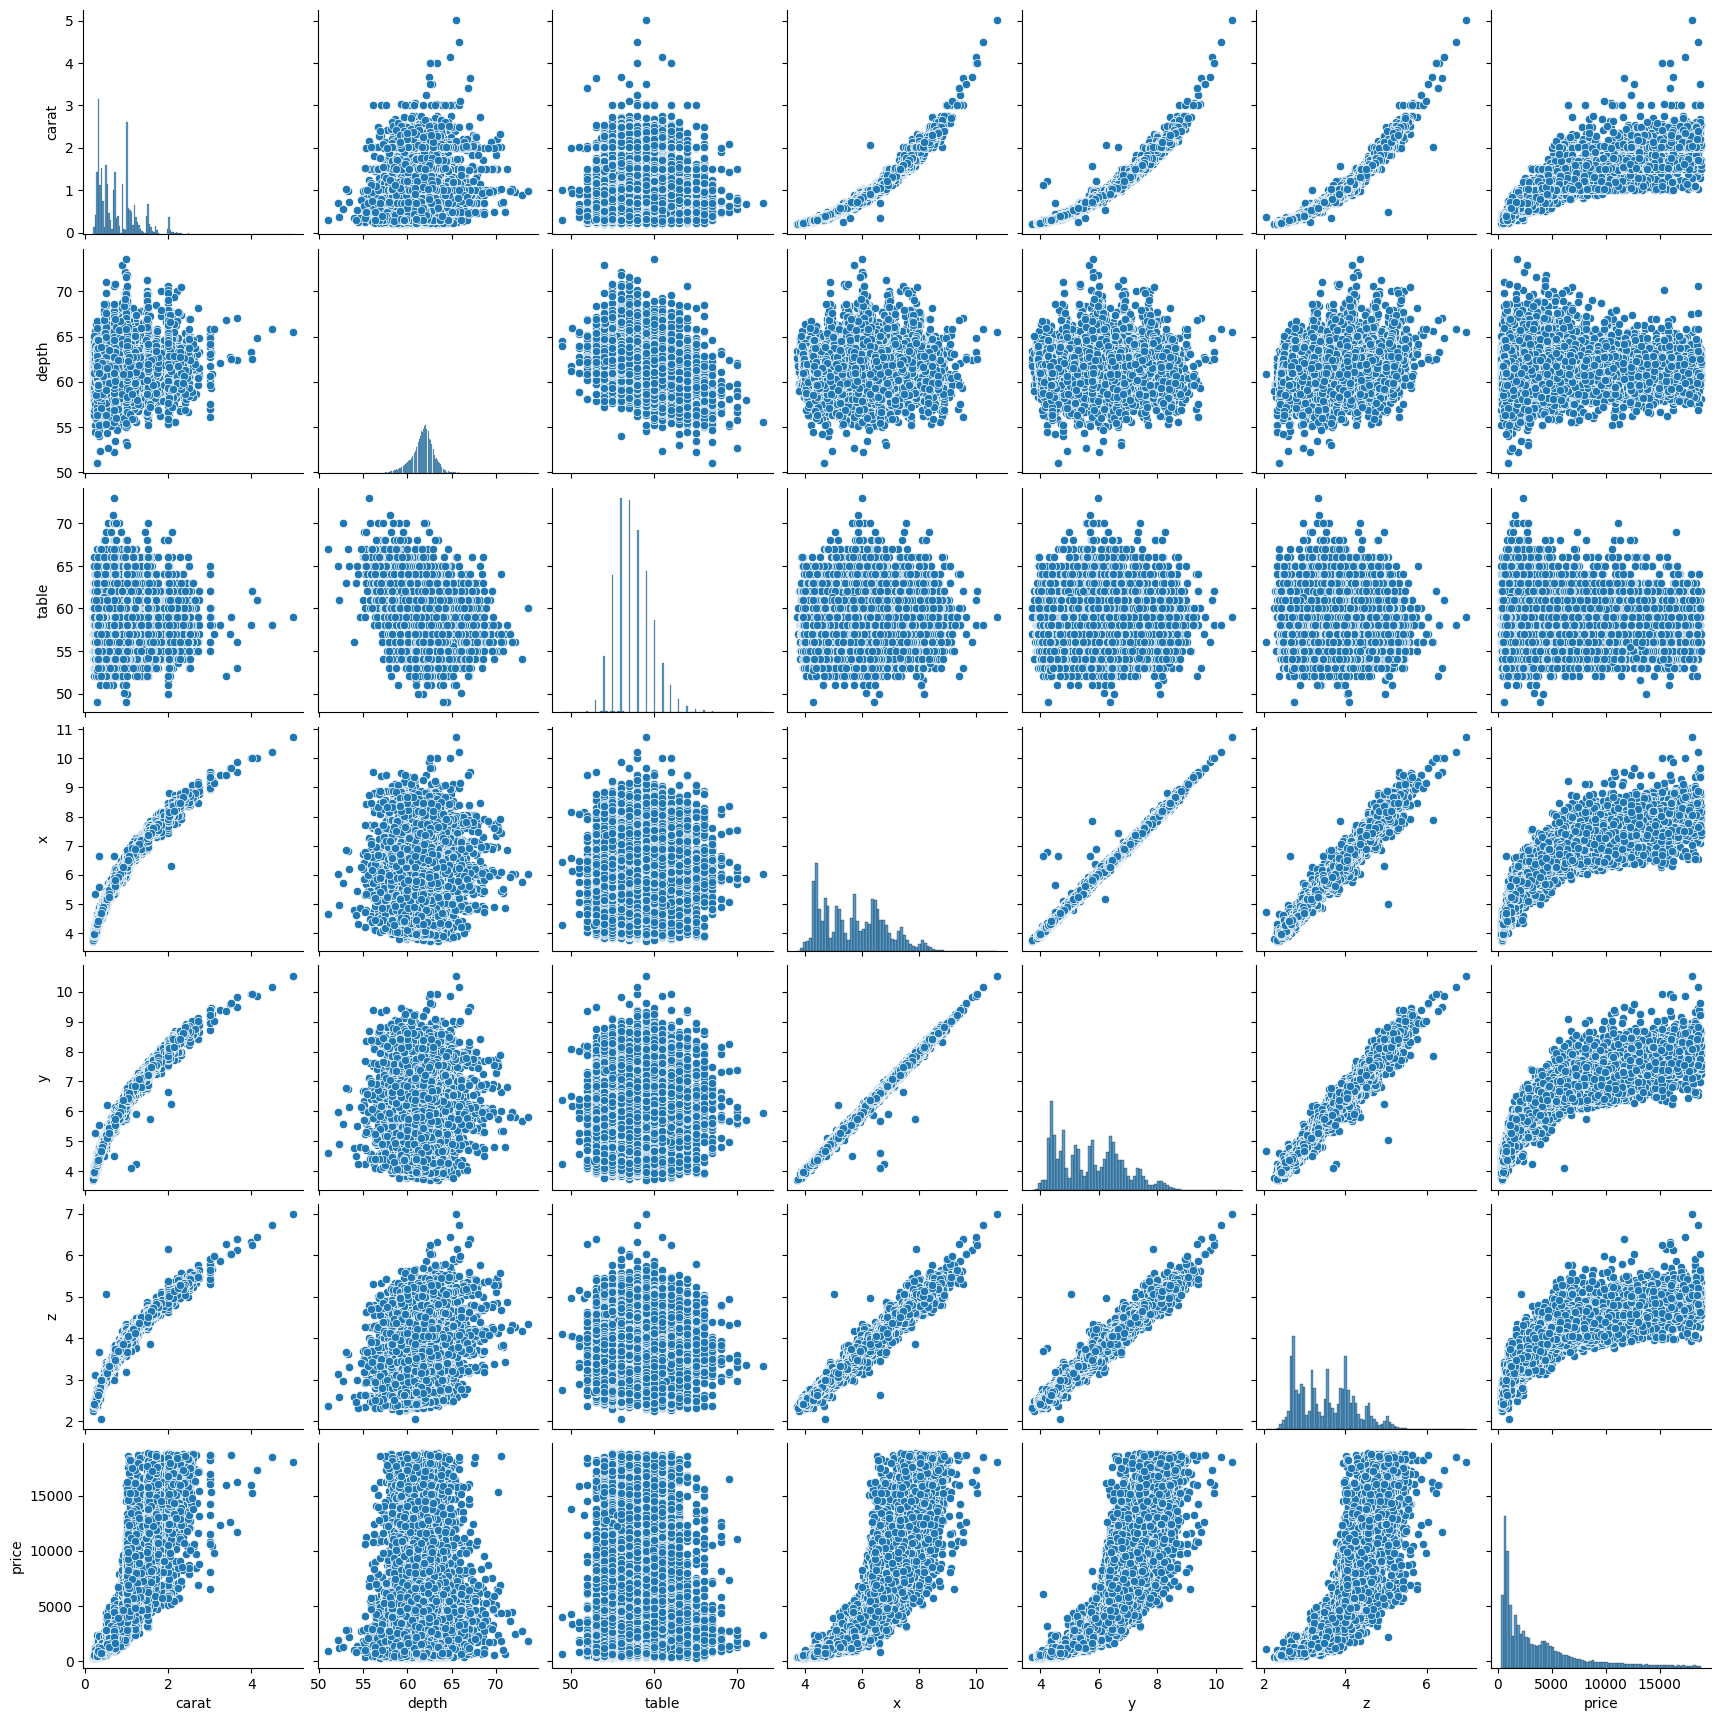

In [ ]:
sns.pairplot(df_clean)

Boxplots of non-categorical data:

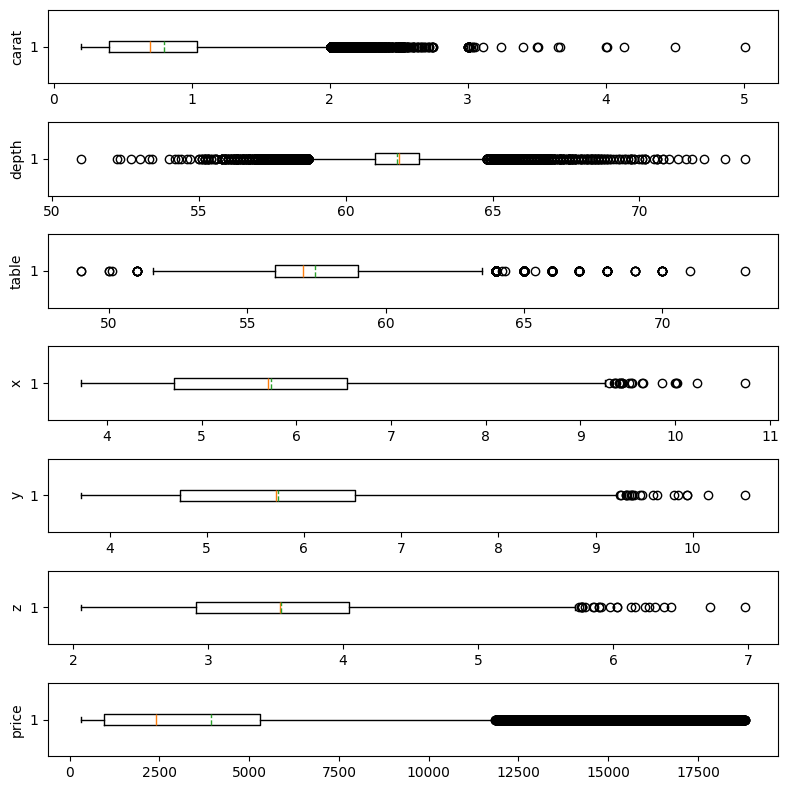

In [ ]:
# Box Plots
fig, axs = plt.subplots(len(non_categorical_cols), 1, figsize=(8, 8))
i = 0
for col in non_categorical_cols:
    axs[i].boxplot(df_clean[col], vert=False, showmeans=True, meanline=True)
    axs[i].set_ylabel(col)
    i += 1
plt.tight_layout()
plt.show()

### f) Convert categorical attributes to numeric. Note that, due to their semantics, the values ​​of each categorical attribute are ordered, and therefore a numeric representation makes more sense than a one-hot encoding.

In [ ]:
# Categorical attributes ordered from worst to best
cut_catg = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_catg = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_catg  = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

# Map each category to a number
df_clean['cut'] = df_clean['cut'].map(cut_catg)
df_clean['color'] = df_clean['color'].map(color_catg)
df_clean['clarity'] = df_clean['clarity'].map(clarity_catg)

df_clean.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,0.53,3,7,4,63.2,56.0,5.10,5.15,3.24,1601
2,0.32,4,3,4,62.4,58.0,4.36,4.33,2.71,648
3,0.76,5,2,3,61.8,57.0,5.89,5.83,3.62,2399
4,1.01,2,3,4,60.8,61.0,6.43,6.50,3.93,5229
5,0.73,5,2,5,62.1,54.0,5.77,5.80,3.59,2167
6,0.31,4,7,3,62.1,58.0,4.33,4.30,2.68,732
7,0.32,3,3,3,61.8,56.0,4.38,4.41,2.71,482
8,0.32,5,3,3,61.2,56.0,4.43,4.46,2.72,430
9,0.70,3,5,3,61.1,57.0,5.70,5.73,3.49,2409


### g) Standardize all attributes separately, except x, y, z, and price.

In [ ]:
atr_to_standarize = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

# Initialize scaler
scaler_std = StandardScaler()
# Standarize data with "fit_transform" and replace the table with the transformed data
df_clean[atr_to_standarize] = scaler_std.fit_transform(df_clean[atr_to_standarize])
df_clean.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,-0.565234,-0.810247,1.522675,-0.033681,1.020420,-0.653054,5.10,5.15,3.24,1601
2,-1.008792,0.084556,-0.828003,-0.033681,0.456735,0.248843,4.36,4.33,2.71,648
3,-0.079432,0.979358,-1.415673,-0.639886,0.033971,-0.202105,5.89,5.83,3.62,2399
4,0.448614,-1.705050,-0.828003,-0.033681,-0.670636,1.601690,6.43,6.50,3.93,5229
5,-0.142797,0.979358,-1.415673,0.572524,0.245353,-1.554952,5.77,5.80,3.59,2167


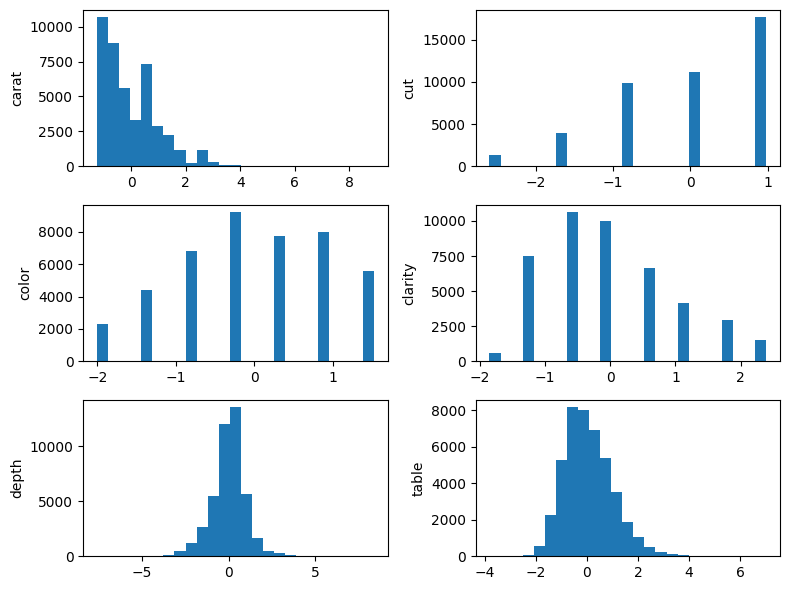

In [ ]:
# Histograms for standarized data
fig, axs = plt.subplots(math.ceil(len(atr_to_standarize)/2), 2, figsize=(8,6))
i = 0
for col in atr_to_standarize:
    axs[i // 2, i % 2].hist(df_clean[col], bins=25)
    axs[i // 2, i % 2].set_ylabel(col)
    i += 1

plt.tight_layout()
plt.show()

### h) Scale x, y, and z between -1 and 1, but together, not each attribute separately.

In this section we need to get the maximum and the minimum of all the values x, y and z.

In [ ]:
atr_to_scale = ['x', 'y', 'z']

# We manipulate their values as a single 1D vector
xyz = df_clean[atr_to_scale].values.flatten()


# Initalize scaler
scale_minmax = MinMaxScaler(feature_range=(-1, 1))
# Scale all values between -1 and 1
scaled_xyz = scale_minmax.fit_transform(xyz.reshape(-1, 1)) # reshape(n_rows, n_columns) before transforming

# Reshape the scaled data to its original dimensions (n_rows, n_columns) and
# replace table with the scaled data
df_clean[atr_to_scale] = scaled_xyz.reshape(-1, len(atr_to_scale))

df_clean.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1,-0.565234,-0.810247,1.522675,-0.033681,1.020420,-0.653054,-0.299539,-0.288018,-0.728111,1601
2,-1.008792,0.084556,-0.828003,-0.033681,0.456735,0.248843,-0.470046,-0.476959,-0.850230,648
3,-0.079432,0.979358,-1.415673,-0.639886,0.033971,-0.202105,-0.117512,-0.131336,-0.640553,2399
4,0.448614,-1.705050,-0.828003,-0.033681,-0.670636,1.601690,0.006912,0.023041,-0.569124,5229
5,-0.142797,0.979358,-1.415673,0.572524,0.245353,-1.554952,-0.145161,-0.138249,-0.647465,2167


### i) Since the price has a range of variation that extends three orders of magnitude, instead of working with the price it is better to do it with its logarithm. Therefore, calculate the logarithm of the prices, store it in a new attribute log_price, and apply a linear scaling between 0.1 and 0.9.

In [ ]:
df_clean['log_price'] = np.log(df_clean['price'])

#  Initalize scaler
scale_log_minmax = MinMaxScaler(feature_range=(0.1, 0.9))

# Scale all values between 0.1 and 0.9 and replace table with the scaled data
df_clean['log_price'] = scale_log_minmax.fit_transform(df_clean[['log_price']])

df_clean.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price
id,,,,,,,,,,,
1,-0.565234,-0.810247,1.522675,-0.033681,1.020420,-0.653054,-0.299539,-0.288018,-0.728111,1601,0.413928
2,-1.008792,0.084556,-0.828003,-0.033681,0.456735,0.248843,-0.470046,-0.476959,-0.850230,648,0.235513
3,-0.079432,0.979358,-1.415673,-0.639886,0.033971,-0.202105,-0.117512,-0.131336,-0.640553,2399,0.493702
4,0.448614,-1.705050,-0.828003,-0.033681,-0.670636,1.601690,0.006912,0.023041,-0.569124,5229,0.647397
5,-0.142797,0.979358,-1.415673,0.572524,0.245353,-1.554952,-0.145161,-0.138249,-0.647465,2167,0.473640


### j) Construct a new attribute high_price that is worth 0 if the price is strictly below $2,500 and 1 otherwise.

In [ ]:
df_clean['high_price'] = np.where(df_clean['price'] >= 2500, 1, 0)

df_clean.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,high_price
id,,,,,,,,,,,,
1,-0.565234,-0.810247,1.522675,-0.033681,1.020420,-0.653054,-0.299539,-0.288018,-0.728111,1601,0.413928,0
2,-1.008792,0.084556,-0.828003,-0.033681,0.456735,0.248843,-0.470046,-0.476959,-0.850230,648,0.235513,0
3,-0.079432,0.979358,-1.415673,-0.639886,0.033971,-0.202105,-0.117512,-0.131336,-0.640553,2399,0.493702,0
4,0.448614,-1.705050,-0.828003,-0.033681,-0.670636,1.601690,0.006912,0.023041,-0.569124,5229,0.647397,1
5,-0.142797,0.979358,-1.415673,0.572524,0.245353,-1.554952,-0.145161,-0.138249,-0.647465,2167,0.473640,0
